The landsat_hires netcdf file can be found at http://glasslab.engr.ccny.cuny.edu/u/hannah/eas213/landsat_hires.nc

If you have the file on your computer, set the path to the location on disk:

```python
datapath = "/path/to/landsat_hires.nc"
```
if you are running the file via mybinder (the interactive version), then set the path to the managed version of the data:

```python
from quilt.data.story645.eas213 import landsat_hires
datapath = landsat_hires._data()
```

You can also install quilt and the data package on your computer to access the data. To do so, enter the following commands in a terminal or anaconda command prompt:

```bash
pip install quilt
quilt install story645/eas213
```

In [ ]:
#set datapath variable in this cell
datapath = 

In [ ]:
import xarray as xr
ds = xr.open_dataset(datapath)

In [ ]:
ds

# Let's look at that variation a bit more:

In [ ]:
import landsat_sample_functions as lf
tempK = lf.BT(ds['Thermal Radiances'], 10.9, 1)
tempF = 9/5*(tempK - 273) + 32

In [ ]:
seasonsT = tempF.groupby('time.season').mean('time')
seasonsT.coords

In [ ]:
%matplotlib inline

# http://xarray.pydata.org/en/stable/plotting.html
_ = seasonsT.plot(x='x', y='y', col='season', col_wrap=2,
                 cmap='coolwarm',vmin=0, vmax=100, 
                 figsize=(5,5))

In [ ]:
seasonsS = tempF.groupby('time.season').mean(['x', 'y'])
seasonsS.coords

In [ ]:
_ = seasonsS.plot(marker='o')

In [ ]:
tempFdf = tempF.to_dataframe()['Thermal Radiances'].to_frame().reset_index()
tempFdf.head()

![boxplot](figs/boxplot.svg)
By Jhguch at en.wikipedia, CC BY-SA 2.5, https://commons.wikimedia.org/w/index.php?curid=14524285

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np 

In [ ]:
# this is to set up pretty labels by finding all the unique times 
# then converting them to d/m/y strings
# 750615 - lat*lon
labels = tempFdf['time'][::750615].dt.strftime("%d/%m/%y").tolist()

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
g = sns.boxplot(x = 'time', y='Thermal Radiances', 
                data=tempFdf, ax=ax)
_ = ax.set_ylabel("Brightness Temperature (F)")
_ = g.set_xticklabels(labels, rotation=45)
fig.savefig("tempf_boxplot.png")

# NDVI:
Using the july 17a and july17b notebooks as reference:
1. compute NDVI
2. compute the temporal and spatial means
3. compute the monthly NDVI
4. compute the seasonal NDVI

In [48]:
ds

<xarray.Dataset>
Dimensions:            (time: 21, x: 921, y: 815)
Coordinates:
    lat                (time, y, x) float64 40.88 40.88 40.88 40.88 40.88 ...
    lon                (time, y, x) float64 -74.07 -74.07 -74.07 -74.06 ...
  * time               (time) datetime64[ns] 2014-04-10 2014-04-26 ...
Dimensions without coordinates: x, y
Data variables:
    Blue               (time, y, x) float64 0.0991 0.0868 0.0807 0.0784 ...
    Thermal Radiances  (time, y, x) float64 8.023 7.835 7.669 7.523 7.41 ...
    UV                 (time, y, x) float64 0.1126 0.1031 0.0981 0.0957 ...
    Green              (time, y, x) float64 0.0774 0.0633 0.0564 0.0533 ...
    NIR                (time, y, x) float64 0.0529 0.0 0.0 0.0 0.0 0.0 0.0 ...
    Red                (time, y, x) float64 0.0694 0.0424 0.0278 0.0234 ...
Attributes:
    _NCProperties:  version=1|netcdflibversion=4.6.1|hdf5libversion=1.10.2

In [50]:
ds['Thermal Radiances']

<xarray.DataArray 'Thermal Radiances' (time: 21, y: 815, x: 921)>
array([[[ 8.023,  7.835, ...,  8.588,  8.554],
        [ 7.726,  7.555, ...,  8.583,  8.552],
        ..., 
        [ 8.788,  8.803, ...,  6.729,  6.73 ],
        [ 8.777,  8.782, ...,  6.729,  6.73 ]],

       [[ 8.195,  8.011, ...,  8.855,  8.85 ],
        [ 7.961,  7.786, ...,  8.838,  8.831],
        ..., 
        [ 8.347,  8.388, ...,  6.934,  6.922],
        [ 8.369,  8.407, ...,  6.936,  6.925]],

       ..., 
       [[ 6.926,  6.844, ...,  8.033,  8.022],
        [ 6.837,  6.744, ...,  8.029,  8.024],
        ..., 
        [ 7.99 ,  7.992, ...,  6.559,  6.555],
        [ 7.973,  7.986, ...,  6.56 ,  6.554]],

       [[ 7.02 ,  7.039, ...,  6.97 ,  6.973],
        [ 7.064,  7.086, ...,  6.964,  6.97 ],
        ..., 
        [ 6.86 ,  6.817, ...,  7.3  ,  7.303],
        [ 6.849,  6.798, ...,  7.304,  7.308]]])
Coordinates:
    lat      (time, y, x) float64 40.88 40.88 40.88 40.88 40.88 40.88 40.88 ...
    lon     

In [51]:
ds['UV']

<xarray.DataArray 'UV' (time: 21, y: 815, x: 921)>
[15762915 values with dtype=float64]
Coordinates:
    lat      (time, y, x) float64 40.88 40.88 40.88 40.88 40.88 40.88 40.88 ...
    lon      (time, y, x) float64 -74.07 -74.07 -74.07 -74.06 -74.06 -74.06 ...
  * time     (time) datetime64[ns] 2014-04-10 2014-04-26 2014-06-29 ...
Dimensions without coordinates: y, x

In [52]:
ds['Red']

<xarray.DataArray 'Red' (time: 21, y: 815, x: 921)>
[15762915 values with dtype=float64]
Coordinates:
    lat      (time, y, x) float64 40.88 40.88 40.88 40.88 40.88 40.88 40.88 ...
    lon      (time, y, x) float64 -74.07 -74.07 -74.07 -74.06 -74.06 -74.06 ...
  * time     (time) datetime64[ns] 2014-04-10 2014-04-26 2014-06-29 ...
Dimensions without coordinates: y, x

In [54]:
ds['NIR'].coords

Coordinates:
    lat      (time, y, x) float64 40.88 40.88 40.88 40.88 40.88 40.88 40.88 ...
    lon      (time, y, x) float64 -74.07 -74.07 -74.07 -74.06 -74.06 -74.06 ...
  * time     (time) datetime64[ns] 2014-04-10 2014-04-26 2014-06-29 ...

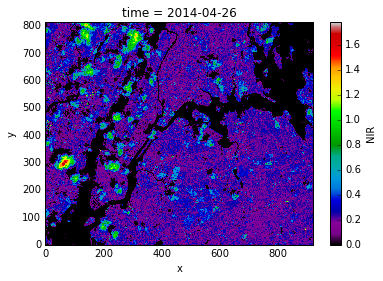

In [58]:
import cmocean.cm as cmo
ds['NIR'].sel(time='2014-04-26').plot(cmap='spectral')

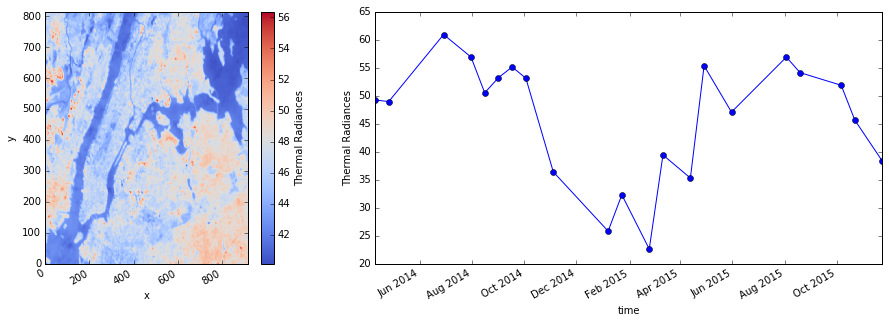

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5),
                               gridspec_kw={'width_ratios':[1,2]})
_ = tempF.mean('time').plot(ax=ax1, cmap='coolwarm')
_ = tempF.mean(['x','y']).plot(ax=ax2, marker='o')